# Exercise: Supervised learning

In this exercise, you will be given two data sets, each of which you are to use to calculate a supervised learning model.


## Task 1: Tumor Classification using K-Nearest Neighbors (KNN)
Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

1. **Preprocessing**
   - Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
   - Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
   - Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
   - Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
   - Perform **hyperparameter tuning** to find the best `k`.

3. **Model Evaluation**:
   - Plot the **confusion matrix** and **classification report**.
   - Compare accuracy for different values of `k` using a **line plot**.

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.




In [32]:
import pandas as pd

data = pd.read_csv('brain_tumor_dataset.csv')

In [7]:
data


Patient_ID  Age  Gender Tumor_Type  Tumor_Size  Location  \
0               1   73    Male  Malignant    5.375612  Temporal   
1               2   26    Male     Benign    4.847098  Parietal   
2               3   31    Male     Benign    5.588391  Parietal   
3               4   29    Male  Malignant    1.436600  Temporal   
4               5   54  Female     Benign    2.417506  Parietal   
...           ...  ...     ...        ...         ...       ...   
19995       19996   21    Male  Malignant    9.612013  Parietal   
19996       19997   32  Female     Benign    1.543560  Temporal   
19997       19998   57  Female     Benign    3.618634  Temporal   
19998       19999   68    Male  Malignant    8.519086  Parietal   
19999       20000   61    Male     Benign    9.716768  Temporal   

             Histology Stage      Symptom_1      Symptom_2      Symptom_3  \
0          Astrocytoma   III  Vision Issues       Seizures       Seizures   
1         Glioblastoma    II       Headache       Headache         Nausea   
2           Meningioma     I  Vision Issues       Headache       Seizures   
3      Medulloblastoma    IV  Vision Issues       Seizures       Headache   
4         Glioblastoma     I       Headache       Headache       Seizures   
...                ...   ...            ...            ...            ...   
19995  Medulloblastoma   III       Seizures         Nausea  Vision Issues   
19996       Meningioma   III       Headache       Headache  Vision Issues   
19997  Medulloblastoma     I       Seizures  Vision Issues         Nausea   
19998     Glioblastoma   III       Seizures       Headache  Vision Issues   
19999  Medulloblastoma     I  Vision Issues       Seizures         Nausea   

      Radiation_Treatment Surgery_Performed Chemotherapy  Survival_Rate  \
0                      No                No           No      51.312579   
1                     Yes               Yes          Yes      46.373273   
2                      No                No           No      47.072221   
3                     Yes                No          Yes      51.853634   
4                      No                No          Yes      54.708987   
...                   ...               ...          ...            ...   
19995                  No                No          Yes      58.229662   
19996                 Yes               Yes           No      77.706856   
19997                  No                No          Yes      89.543803   
19998                 Yes               Yes          Yes      83.306781   
19999                  No                No           No      47.433468   

       Tumor_Growth_Rate Family_History MRI_Result Follow_Up_Required  
0               0.111876             No   Positive                Yes  
1               2.165736            Yes   Positive                Yes  
2               1.884228             No   Negative                 No  
3               1.283342            Yes   Negative                 No  
4               2.069477             No   Positive                Yes  
...                  ...            ...        ...                ...  
19995           0.353806             No   Negative                Yes  
19996           2.341074             No   Positive                 No  
19997           2.332881             No   Positive                Yes  
19998           2.387202             No   Positive                 No  
19999           2.464077            Yes   Negative                Yes  

[20000 rows x 19 columns]

In [9]:
data["Gender"].dtype 

dtype('O')

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

categorical_cols = ['Gender', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
                   'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History',
                   'MRI_Result', 'Follow_Up_Required']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [36]:

X = data.drop(['Patient_ID', 'Tumor_Type'], axis=1)
y = data['Tumor_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

best_k = knn_cv.best_params_['n_neighbors']
best_k

25

In [21]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Benign       0.48      0.48      0.48      1997
   Malignant       0.49      0.49      0.49      2003

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



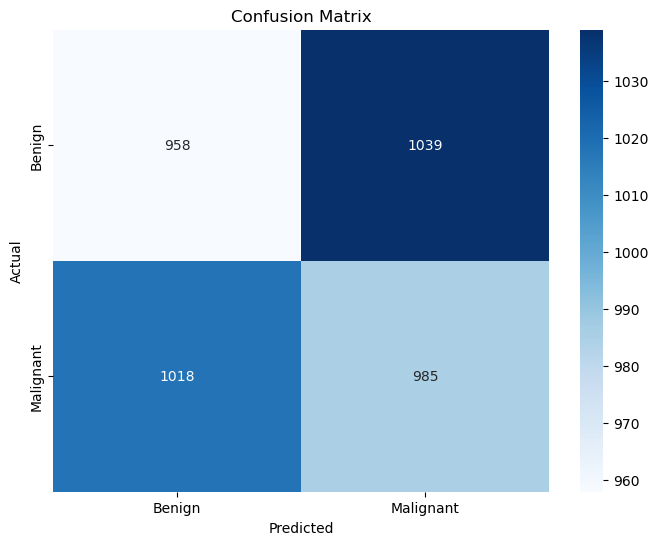

In [14]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

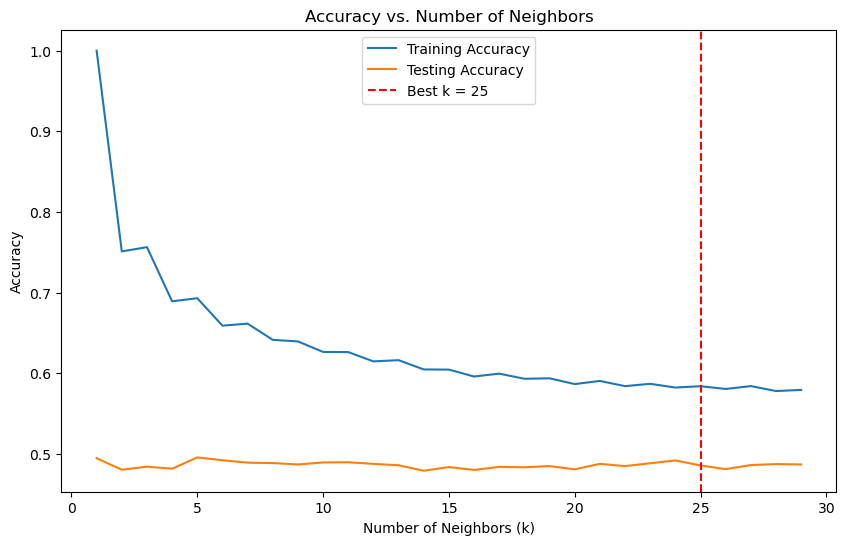

In [17]:
k_values = np.arange(1, 30)
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.show()

In [6]:

final_accuracy = knn.score(X_test_scaled, y_test)
final_accuracy

0.487

The model has low accuracy and is not reliable for making classifications.

## Task 2
The goal of this exercise is to predict **Life Expectancy** (`Life expectancy`) based on various health, economic, and demographic factors using **Linear Regression**. The model should be optimized using **Ridge and Lasso Regression**.

1. **Preprocessing**
- Remove irrelevant columns (`Country`, `Year`).
- Encode categorical variables (`Status`).
- Handle missing values appropriately.
- Standardize numerical features (e.g., `GDP`, `Schooling`, `Alcohol`) using `StandardScaler`.
- Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
- Train a **basic Linear Regression** model and evaluate its performance.
- Implement **Ridge Regression** and **Lasso Regression**, tuning the `alpha` hyperparameter using **cross-validation**.

3. **Model Evaluation**:
- Compute the **Root Mean Squared Error (MSE)** for all models.
- Compare Ridge and Lasso performance to determine if regularization improves results.
- Plot **actual vs. predicted life expectancy** scores for each model.


In [25]:
import pandas as pd
df = pd.read_csv("Life Expectancy Data.csv")

In [14]:
df

Patient_ID  Age  Gender Tumor_Type  Tumor_Size  Location  \
0               1   73    Male  Malignant    5.375612  Temporal   
1               2   26    Male     Benign    4.847098  Parietal   
2               3   31    Male     Benign    5.588391  Parietal   
3               4   29    Male  Malignant    1.436600  Temporal   
4               5   54  Female     Benign    2.417506  Parietal   
...           ...  ...     ...        ...         ...       ...   
19995       19996   21    Male  Malignant    9.612013  Parietal   
19996       19997   32  Female     Benign    1.543560  Temporal   
19997       19998   57  Female     Benign    3.618634  Temporal   
19998       19999   68    Male  Malignant    8.519086  Parietal   
19999       20000   61    Male     Benign    9.716768  Temporal   

             Histology Stage      Symptom_1      Symptom_2      Symptom_3  \
0          Astrocytoma   III  Vision Issues       Seizures       Seizures   
1         Glioblastoma    II       Headache       Headache         Nausea   
2           Meningioma     I  Vision Issues       Headache       Seizures   
3      Medulloblastoma    IV  Vision Issues       Seizures       Headache   
4         Glioblastoma     I       Headache       Headache       Seizures   
...                ...   ...            ...            ...            ...   
19995  Medulloblastoma   III       Seizures         Nausea  Vision Issues   
19996       Meningioma   III       Headache       Headache  Vision Issues   
19997  Medulloblastoma     I       Seizures  Vision Issues         Nausea   
19998     Glioblastoma   III       Seizures       Headache  Vision Issues   
19999  Medulloblastoma     I  Vision Issues       Seizures         Nausea   

      Radiation_Treatment Surgery_Performed Chemotherapy  Survival_Rate  \
0                      No                No           No      51.312579   
1                     Yes               Yes          Yes      46.373273   
2                      No                No           No      47.072221   
3                     Yes                No          Yes      51.853634   
4                      No                No          Yes      54.708987   
...                   ...               ...          ...            ...   
19995                  No                No          Yes      58.229662   
19996                 Yes               Yes           No      77.706856   
19997                  No                No          Yes      89.543803   
19998                 Yes               Yes          Yes      83.306781   
19999                  No                No           No      47.433468   

       Tumor_Growth_Rate Family_History MRI_Result Follow_Up_Required  
0               0.111876             No   Positive                Yes  
1               2.165736            Yes   Positive                Yes  
2               1.884228             No   Negative                 No  
3               1.283342            Yes   Negative                 No  
4               2.069477             No   Positive                Yes  
...                  ...            ...        ...                ...  
19995           0.353806             No   Negative                Yes  
19996           2.341074             No   Positive                 No  
19997           2.332881             No   Positive                Yes  
19998           2.387202             No   Positive                 No  
19999           2.464077            Yes   Negative                Yes  

[20000 rows x 19 columns]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.952e+02, tolerance: 1.671e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.385e+01, tolerance: 1.701e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.788e+01, toler

Model Performance:
Linear Regression RMSE: 3.9106
Ridge Regression RMSE: 3.9106 (Best alpha: 0.001)
Lasso Regression RMSE: 3.9112 (Best alpha: 0.001)


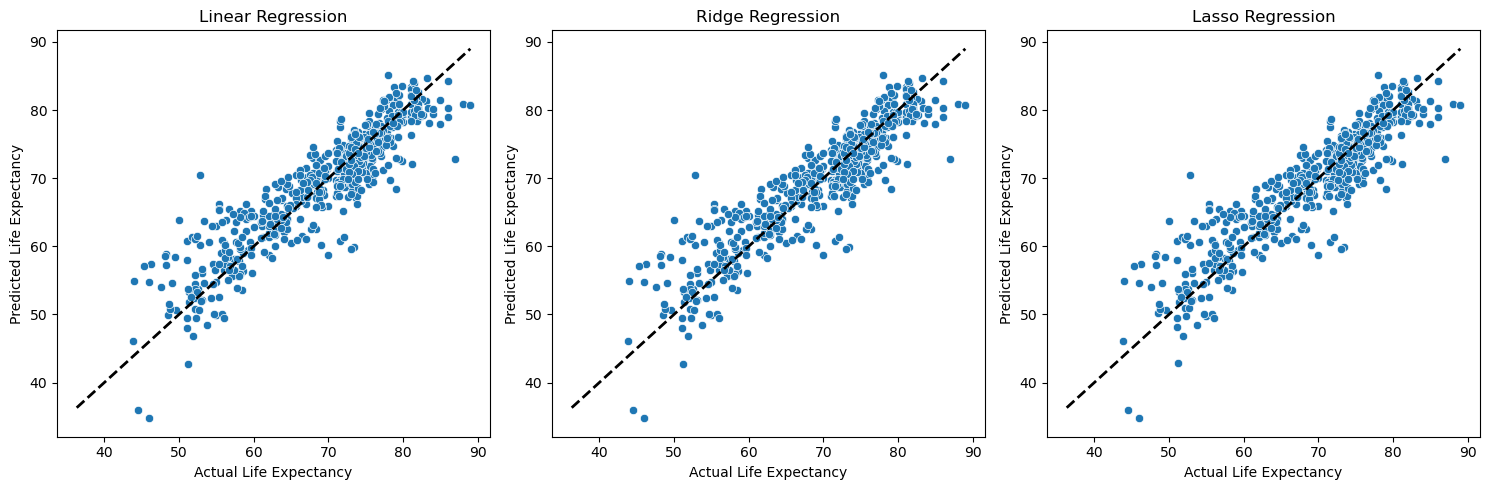


Top 10 Most Important Features from Lasso Regression:
                            Feature  Importance
1                     infant deaths   10.507580
17                        Schooling    2.074083
16  Income composition of resources    1.245950
10                      Diphtheria     0.991447
6                              BMI     0.820042
8                             Polio    0.650525
12                              GDP    0.505349
2                           Alcohol    0.213376
3            percentage expenditure    0.101434
9                 Total expenditure    0.087155


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    df = df.drop(['Country', 'Year'], axis=1)
    
    df = pd.get_dummies(df, columns=['Status'], drop_first=True)
    
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    return df

df_processed = preprocess_data(df)

X = df_processed.drop('Life expectancy ', axis=1)
y = df_processed['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)
best_ridge = ridge_regressor.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_scaled, y_train)
best_lasso = lasso_regressor.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Model Performance:")
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.4f} (Best alpha: {best_ridge.alpha})")
print(f"Lasso Regression RMSE: {rmse_lasso:.4f} (Best alpha: {best_lasso.alpha})")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Ridge Regression')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lasso.coef_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features from Lasso Regression:")
print(feature_importance.head(10))